
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Max Rosado Vidal - Víctor Martínez Campos - Lucio Fondón Rebolledo </H3>

<H3 align='center'> Tarea/Taller 1 </H3>
<hr style="height:2px;border:none"/>


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 24 Septiembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 


# Parte 1. Pregunta de Investigación


Tema **1. Discriminativos versus Generativos.** Con muy pocos ejemplos etiquetados, un clasificador generativo alcanza un menor error de clasificación que un clasificador discriminativo. Sin embargo, a medida que aumenta el número de ejemplos de entrenamiento, la situación se invierte.

Nota: Puede fijar los clasificadores base motivando su elección. Para explorar la hipótesis puede reducir gradualmente el número de datos (por ejemplo a la mitad cada vez). Un dataset excesivamente pequeño dificulta este procedimiento. 


Usaremos 2 datasets:
* __Amazon Customer-Reviews Polarity__ (https://www.kaggle.com/datasets/bhavikardeshna/amazon-customerreviews-polarity): Dataset de reviews de productos de 
Amazon, con más de 3.6 millones de reviews clasificadas binariamente como reviews positivas y negativas


* __Credit Card Fraud__ (https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud): Dataset de datos de transacciones bancarias, que indican si una transacción es fraude o no

Sobre estos 2 datasets, se aplicarán 4 modelos predictivos, 2 discriminativos y 2 generativos, los cuáles son:
* **Perceptrón**
* **Regresión Logística**
* **Bernoulli Naive-Bayes**
* **Multinomial Naive-Bayes** (solo se aplica al primer dataset)

Durante la aplicación de estos modelos a los datos, se irá variando la cantidad de ejemplos de la data provista, de tal manera que se pueda obtener evidencia de como varía el error de predicción de los modelos a medida que variamos la cantidad de datos a nuestra disposición, y a partir de lo anterior obtener conclusiones y ver si podemos validar la hipótesis planteada inicialmente

# Amazon Customer-Reviews Polarity

## Análisis Exploratorio De Datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


In [ ]:
#Si carga los datos localmente no necesita ejecutar esta celda.
#Si los carga desde Drive, debe cambiar la ruta a la carpeta donde se encuentran. 

print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=False)
 
path = "/content/drive/My Drive/Taller 1 - ML/"#Esta es la ruta


Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
df_amazon_train = pd.read_csv(path+'Amazon Product Review/amazon_review_sa_binary_csv/train.csv')
df_amazon_train

,class_index,review_title,review_text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [ ]:
# notemos que el problema se encuentra balanceado
print('Train set\n', df_amazon_train['class_index'].value_counts())

Train set
 2    1800000
1    1800000
Name: class_index, dtype: int64


In [ ]:
# revisar cuantos datos faltan por columna
print("Número de datos NaN por feature Test: \n")
print(df_amazon_train.isnull().sum(axis = 0))


Número de datos NaN por feature Test: 

class_index      0
review_title    77
review_text      0
dtype: int64


La clase __review_title__ contiene 77 ejemplos NaN, simplemente eliminaremos las filas que tengan estos nulos

In [ ]:
# dropeamos todas las filas que contengan valores nan
df_amazon_train.dropna(inplace=True)

Si bien necesitamos una gran cantidad de datos para poder entrenar nuestros modelos y también para ver un efecto significativo al variar la cantidad de ejemplos, usaremos una muestra del 10% de los datos para que el proceso de análisis, preprocesamiento, vectorización y entrenamiento no sea tan largo

In [ ]:
# muestra
df_amazon_train_sample = df_amazon_train.sample(random_state=1, frac=0.1)
df_amazon_train_sample

,class_index,review_title,review_text
3501127,1,The Cypher,I think this book had potential to be scary..b...
1102974,2,A fun book for sucessful single women in the d...,Hello! Straight from the fast track in Califor...
1914021,2,New face of magnificent Jazz artist,"His sound is truly jazzy, I have never heard o..."
770172,2,Johnny Staccato Is Back!,Just as I remember. Quality of video is better...
1900557,1,Bluescreens Galore,"Using an XP SP2 laptop, the card wouldn't work..."
...,...,...,...
488545,1,"Keep your ""kingdom."" Just LEMME OUT!!",I have never encountered writings that made me...
3237588,2,Great Humidifier but a little small,I had a few humidifiers over the years and thi...
130433,2,NPFTD,When this album came out it was on the heels o...
1721273,1,"Here we go again- ""The focus on the fan...""","Yet another of McCartney's endless ego trips, ..."


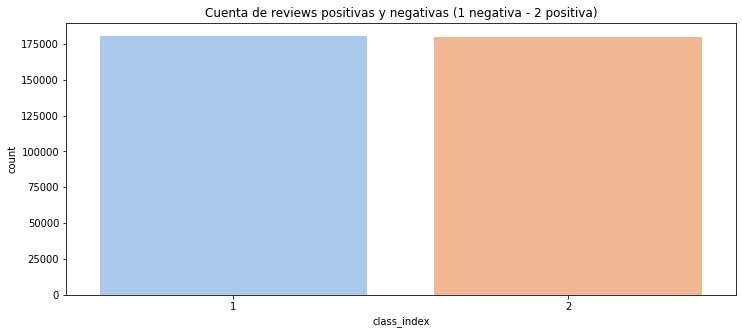

1    180484
2    179508
Name: class_index, dtype: int64

In [ ]:
# notemos que la cuenta se encuentra balanceada luego del muestreo
fig, ax = plt.subplots(figsize=(12,5),nrows=1)
sns.countplot(x="class_index", data=df_amazon_train_sample, palette="pastel", ax = ax)
ax.set_title('Cuenta de reviews positivas y negativas (1 negativa - 2 positiva)')
plt.show()

df_amazon_train_sample['class_index'].value_counts()

In [ ]:
# juntaremos las dos columnas de review_title y review_text
df_amazon_train_sample["review"] = df_amazon_train_sample["review_title"] + " " + df_amazon_train_sample["review_text"]

In [ ]:
df_amazon_train_sample

,class_index,review_title,review_text,review
3501127,1,The Cypher,I think this book had potential to be scary..b...,The Cypher I think this book had potential to ...
1102974,2,A fun book for sucessful single women in the d...,Hello! Straight from the fast track in Califor...,A fun book for sucessful single women in the d...
1914021,2,New face of magnificent Jazz artist,"His sound is truly jazzy, I have never heard o...",New face of magnificent Jazz artist His sound ...
770172,2,Johnny Staccato Is Back!,Just as I remember. Quality of video is better...,Johnny Staccato Is Back! Just as I remember. Q...
1900557,1,Bluescreens Galore,"Using an XP SP2 laptop, the card wouldn't work...","Bluescreens Galore Using an XP SP2 laptop, the..."
...,...,...,...,...
488545,1,"Keep your ""kingdom."" Just LEMME OUT!!",I have never encountered writings that made me...,"Keep your ""kingdom."" Just LEMME OUT!! I have n..."
3237588,2,Great Humidifier but a little small,I had a few humidifiers over the years and thi...,Great Humidifier but a little small I had a fe...
130433,2,NPFTD,When this album came out it was on the heels o...,NPFTD When this album came out it was on the h...
1721273,1,"Here we go again- ""The focus on the fan...""","Yet another of McCartney's endless ego trips, ...","Here we go again- ""The focus on the fan..."" Ye..."


In [ ]:
# removemos las columnas separadas
df_amazon_train_sample = df_amazon_train_sample.drop(columns=['review_title', 'review_text'])

In [ ]:
df_amazon_train_sample

,class_index,review
3501127,1,The Cypher I think this book had potential to ...
1102974,2,A fun book for sucessful single women in the d...
1914021,2,New face of magnificent Jazz artist His sound ...
770172,2,Johnny Staccato Is Back! Just as I remember. Q...
1900557,1,"Bluescreens Galore Using an XP SP2 laptop, the..."
...,...,...
488545,1,"Keep your ""kingdom."" Just LEMME OUT!! I have n..."
3237588,2,Great Humidifier but a little small I had a fe...
130433,2,NPFTD When this album came out it was on the h...
1721273,1,"Here we go again- ""The focus on the fan..."" Ye..."


## Preprocesamiento del texto

Realizaremos el procesamiento del texto de manera simple, primero pasaremos a lower case todo el dataset, además quitaremos los signos de puntuación, después removeremos los stopwords, también vamos a tokenizarlos, y luego  aplicaremos lematización para finalmente vectorizarlo para poder ser aplicados a los modelos

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tokenizer = TfidfVectorizer().build_tokenizer() #Return a function that splits a string into a sequence of tokens considering unicode characters
lemmatizer = WordNetLemmatizer() # lematizador

def pre_processing_text(df):
    df_copy = df.copy()
    
     # quitamos signos de puntuación 
    df_copy["review"] = df_copy['review'].str.replace('[^\w\s]',' ')
    
    # pasamos a lowercase
    df_copy['review'] = df_copy['review'].str.lower()
    
    # quitamos stopwords
    stop = set(stopwords.words('english'))
    df_copy['review'] = df_copy['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
    
    return df_copy    

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_amazon_train_sample_pre_processed = pre_processing_text(df_amazon_train_sample) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() # lematizador
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tokenizer = TfidfVectorizer().build_tokenizer() #Return a function that splits a string into a sequence of tokens considering unicode characters
lemmatizer = WordNetLemmatizer()

#stop-words: el vectorizador ya las remueve pero para mostrar las palabras más frecuente tiene sentido activarlo
remove_stops_here = False

def my_pre_processer(text, debug = False):
    results = []
    for token in tokenizer(text):
        clean_token = token.lower().strip('-').strip('_')
        token_pro = lemmatizer.lemmatize(clean_token) 
        if len(token_pro) > 2 and not token_pro[0].isdigit(): #elimina palabra largo menor a 2
            results.append(token_pro)
    return results



In [ ]:
df_amazon_train_sample_pre_processed['tokenized_review'] = df_amazon_train_sample_pre_processed['review'].apply(my_pre_processer)


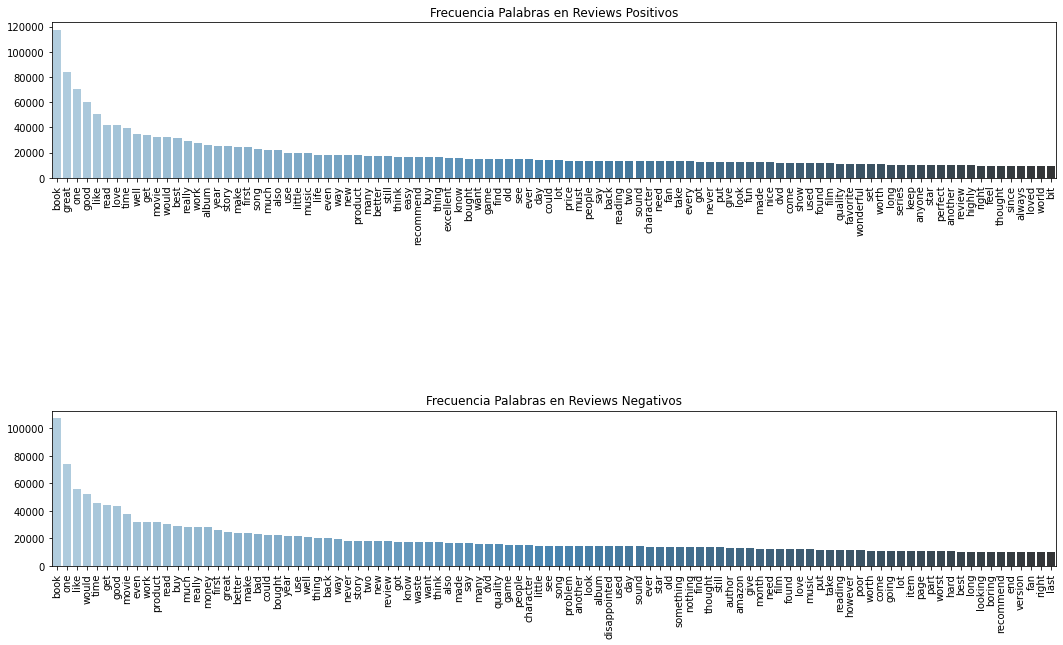

In [ ]:
all_tokens_pos = [token for sublist in df_amazon_train_sample_pre_processed[df_amazon_train_sample_pre_processed.class_index==2].tokenized_review for token in sublist]
all_tokens_neg = [token for sublist in df_amazon_train_sample_pre_processed[df_amazon_train_sample_pre_processed.class_index==1].tokenized_review for token in sublist]

from collections import Counter
freqs_pos = Counter(all_tokens_pos)
freqs_neg = Counter(all_tokens_neg)

sorted_words_pos  =  {k: v for k, v in sorted(freqs_pos.items(), key=lambda item: item[1], reverse=True)}
sorted_words_neg =  {k: v for k, v in sorted(freqs_neg.items(), key=lambda item: item[1], reverse=True)}

top = 100
y_pos = [float(y) for y in sorted_words_pos.values()]
x_pos = [x for x in sorted_words_pos.keys()]
y_neg = [float(y) for y in sorted_words_neg.values()]
x_neg = [x for x in sorted_words_neg.keys()]


fig, ax = plt.subplots(figsize=(18,10),nrows=2)
p1 = sns.barplot(x=x_pos[:top],y=y_pos[:top],palette="Blues_d",ax=ax[0])
p2 = sns.barplot(x=x_neg[:top],y=y_neg[:top],palette="Blues_d",ax=ax[1])
ax[0].set_title('Frecuencia Palabras en Reviews Positivos')
ax[1].set_title('Frecuencia Palabras en Reviews Negativos')
plt.subplots_adjust(hspace=1.5)
plt.setp(p1.get_xticklabels(), rotation=90)
plt.setp(p2.get_xticklabels(), rotation=90)
plt.show()

# esto es sacado literal de la ayudantía

Podemos notar que existen aún muchas "stopwords" dentro del contexto del problema, ya que por ejemplo las palabras de los productos se repiten tanto en textos negativos como positivos, por ejemplo con palabras como:
* book
* movie
* product
* read
* dvd 
* music

Además, existen palabras que se podrían atribuir a cualquiera de los dataset, pero pareciera que son positivas o negativas (por ejemplo, la palabra good, great y better están con alta frecuencia tanto en las evaluaciones positivas como negativas, pero es probable que es en las reviews negativas estas palabras se encuentre junto a otras que la nieguen. Se tiene esta hipótesis debido a que no sucede con palabras como love o bad, ya que estas se encuentran solo en las reviews positivas y negativas respectivamente).

## Vectorización

In [ ]:
from sklearn.model_selection import train_test_split

# combinaciones de palabras mas frecuentes. build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
max_features = 10000 
max_df = 0.8
min_df = 21
ngram_max = 1

In [ ]:
y = df_amazon_train_sample_pre_processed['class_index']

In [ ]:
# X, y -> dataset
def vectorize_countvectorizer_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    vectorizer = CountVectorizer(stop_words='english', tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                                  binary=True, ngram_range=(1, ngram_max))
        
    X_train = vectorizer.fit_transform(X_train['review']) # fit + transform datos de train
    X_val = vectorizer.transform(X_val['review']) # datos de validacion
    X_test = vectorizer.transform(X_test['review']) # datos de test

    print("\nX,y Train Shapes:", X_train.shape, y_train.shape)
    print("X,y Val Shapes:", X_val.shape, y_val.shape)
    print("X,y Test Shapes:", X_test.shape, y_test.shape)

    return X_train, y_train, X_val, y_val, X_test, y_test


In [ ]:
# X, y -> dataset
def vectorize_tfidvectorizer_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    vectorizer = TfidfVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                                  binary=False, use_idf=True, smooth_idf=True, norm=None, ngram_range=(1, ngram_max))
    
    X_train = vectorizer.fit_transform(X_train['review']) # fit + transform datos de train
    X_val = vectorizer.transform(X_val['review']) # datos de validacion
    X_test = vectorizer.transform(X_test['review']) # datos de test

    print("\nX,y Train Shapes:", X_train.shape, y_train.shape)
    print("X,y Val Shapes:", X_val.shape, y_val.shape)
    print("X,y Test Shapes:", X_test.shape, y_test.shape)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
def Logistic(x_train, y_train, x_val, y_val, x_test, y_test):
    clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(x_train, y_train)
    
    s_train = clf.score(x_train, y_train)      # accuracy train
    s_val = clf.score(x_val, y_val)            # accuracy validacion
    s_test = clf.score(x_test, y_test)         # accuracy test
    
    print("Score Logistic Train Perc: ", s_train)
    print("Score Logistic Valid Perc: ", s_val)
    print("Score Logistic Test Perc: ", s_test)
    print("")
    
    return s_train, s_val, s_test

In [ ]:
from sklearn.linear_model import Perceptron
def Perc(x_train, y_train, x_val, y_val, x_test, y_test):
    clf2 = Perceptron(tol=1e-3, random_state=0)
    clf2.fit(x_train, y_train)                
    
    s_train = clf2.score(x_train, y_train)     # accuracy train                                               
    s_val = clf2.score(x_val, y_val)           # accuracy validacion
    s_test = clf2.score(x_test, y_test)        # accuracy test
    
    print("Score Perc Train Perc: ", s_train)
    print("Score Perc Valid Perc: ", s_val)
    print("Score Perc Test Perc: ", s_test)
    print("")
    
    return s_train, s_val, s_test

In [ ]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


def NBC(x_train, y_train, x_val, y_val, x_test, y_test):

    clf = BernoulliNB(alpha=1)  
    clf.fit(x_train, y_train) 

    s_train = clf.score(x_train, y_train)

    s_train = clf.score(x_train, y_train)      # accuracy train
    s_val = clf.score(x_val, y_val)            # accuracy validacion
    s_test = clf.score(x_test, y_test)         # accuracy test 
    
    print("Score NBC Train Perc: ", s_train)
    print("Score NBC Valid Perc: ", s_val)
    print("Score NBC Test Perc: ", s_test)
    print("")
    
    return s_train, s_val, s_test


In [ ]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


def MultiNBC(x_train, y_train, x_val, y_val, x_test, y_test):

    clf = MultinomialNB(alpha=1)
    clf.fit(x_train, y_train) 

    s_train = clf.score(x_train, y_train)

    s_train = clf.score(x_train, y_train)   # accuracy train   
    s_val = clf.score(x_val, y_val)         # accuracy validacion
    s_test = clf.score(x_test, y_test)      # test




    
    print("Score MultiNBC Train Perc: ", s_train)
    print("Score MultiNBC Valid Perc: ", s_val)
    print("Score MultiNBC Test Perc: ", s_test)
    print("")
    
    return s_train, s_val, s_test


In [ ]:
fracs = list(np.arange(0.01, 1 + 0.03, 0.03, dtype=float))
print(fracs)

[0.01, 0.04, 0.06999999999999999, 0.09999999999999999, 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.33999999999999997, 0.37, 0.4, 0.43, 0.45999999999999996, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.6699999999999999, 0.7, 0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.9099999999999999, 0.94, 0.97, 1.0]


In [ ]:
# ahora realizaremos la prueba con n datos de prueba, para ver como evoluciona el accuracy¿

# probando con el 1% hasta el 100%, de 3 en 3

fracs = list(np.arange(0.01, 1 + 0.03, 0.03, dtype=float))
print(fracs)

s_NBC = []
s_MultiNBC = []
s_Perc = []
s_Logistic = []
for frac in fracs:
    print(f"Probando con el {frac:.0%} de los datos ")
    df_frac = df_amazon_train_sample_pre_processed.sample(frac=frac)
    y_frac = df_frac['class_index']
    X_train, y_train, X_val, y_val, X_test, y_test = vectorize_tfidvectorizer_data(df_frac, y_frac)
    s_train_NBC, s_valid_NBC, s_test_NBC = NBC(X_train, y_train, X_val, y_val, X_test, y_test)
    s_train_MultiNBC, s_valid_MultiNBC, s_test_MultiNBC = MultiNBC(X_train, y_train, X_val, y_val, X_test, y_test)
    s_train_Perc, s_valid_Perc, s_test_Perc = Perc(X_train, y_train, X_val, y_val, X_test, y_test)
    s_train_Logistic, s_valid_Logistic, s_test_Logistic = Logistic(X_train, y_train, X_val, y_val, X_test, y_test)

    
    s_NBC.append((s_train_NBC, s_valid_NBC, s_test_NBC))
    s_MultiNBC.append((s_train_MultiNBC, s_valid_MultiNBC, s_test_MultiNBC))
    s_Perc.append((s_train_Perc, s_valid_Perc, s_test_Perc))
    s_Logistic.append((s_train_Logistic, s_valid_Logistic, s_test_Logistic))


[0.01, 0.04, 0.06999999999999999, 0.09999999999999999, 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.33999999999999997, 0.37, 0.4, 0.43, 0.45999999999999996, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.6699999999999999, 0.7, 0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.9099999999999999, 0.94, 0.97, 1.0]
Probando con el 1% de los datos 

X,y Train Shapes: (2304, 581) (2304,)
X,y Val Shapes: (576, 581) (576,)
X,y Test Shapes: (720, 581) (720,)
Score NBC Train Perc:  0.83203125
Score NBC Valid Perc:  0.7934027777777778
Score NBC Test Perc:  0.7944444444444444

Score MultiNBC Train Perc:  0.8350694444444444
Score MultiNBC Valid Perc:  0.7534722222222222
Score MultiNBC Test Perc:  0.7708333333333334

Score Perc Train Perc:  0.87109375
Score Perc Valid Perc:  0.7517361111111112
Score Perc Test Perc:  0.75

Score Logistic Train Perc:  0.92578125
Score Logistic Valid Perc:  0.7395833333333334
Score Logistic Test Perc:  0.7625

Probando con el 4% de los datos 

X,y Train Shapes: (9216, 2039) (9216,)
X,y Val S

In [ ]:
def plot_scores(dataset_type='train'):
    n_tupla = 0
    
    if dataset_type == 'val':
        n_tupla = 1
        
    if dataset_type == 'test':
        n_tupla = 2
    
    scores_df = pd.DataFrame(fracs)

    scores_df[f's_Logistic_{dataset_type}'] = [s[n_tupla] for s in s_Logistic]
    scores_df[f's_Perc_{dataset_type}'] = [s[n_tupla] for s in s_Perc]
    scores_df[f's_NB_{dataset_type}'] = [s[n_tupla] for s in s_NBC]
    scores_df[f's_MultinomialNB_{dataset_type}'] = [s[n_tupla] for s in s_MultiNBC]

    scores_df.rename(columns = {0:'frac'}, inplace = True)
    scores_df = scores_df.set_index('frac')

    # display(scores_df)

    # plot using lineplot
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(15,5)})
    plt.ylabel(f"{dataset_type} scores")
    plt.title(f'{dataset_type.capitalize()} score variation frac sample size')
    sns.lineplot(data=scores_df)
    plt.show()

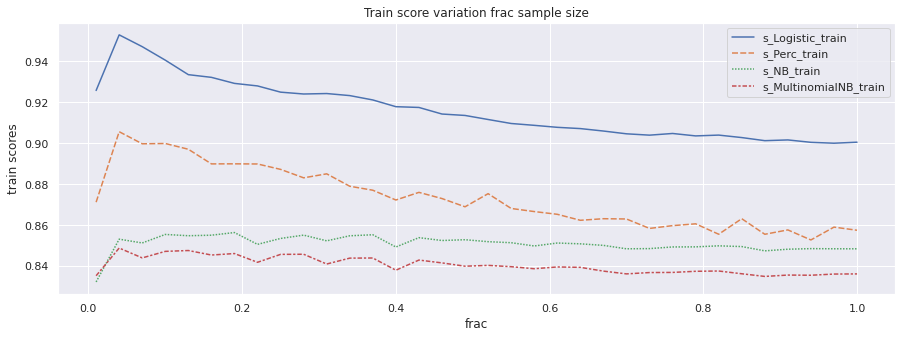

In [ ]:
plot_scores()

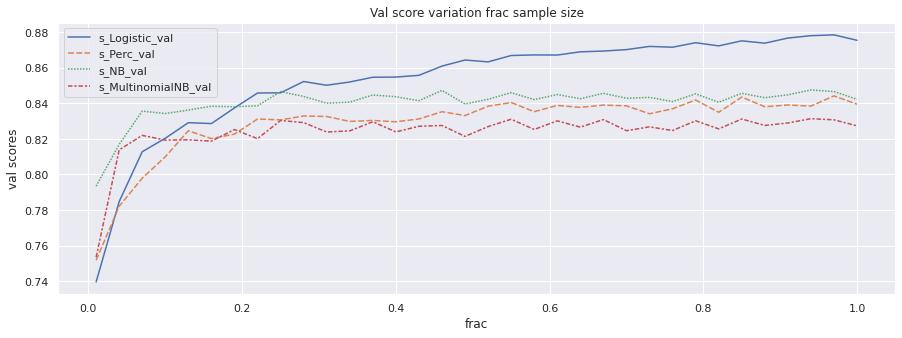

In [ ]:
plot_scores(dataset_type='val')

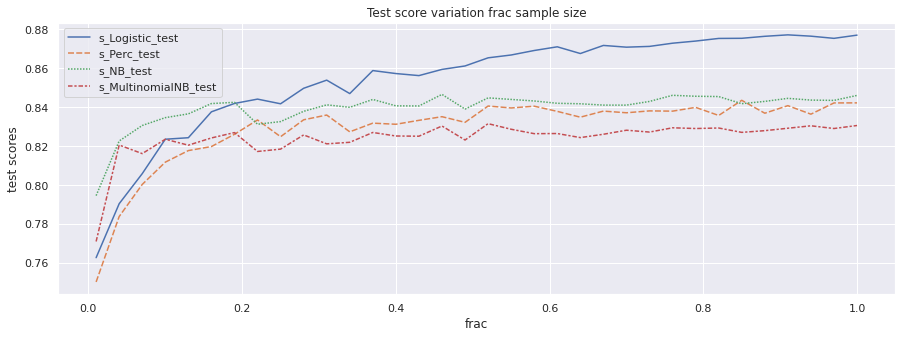

In [ ]:
plot_scores(dataset_type='test')

# Credit Card Fraud

In [ ]:
#Si carga los datos localmente no necesita ejecutar esta celda.
#Si los carga desde Drive, debe cambiar la ruta a la carpeta donde se encuentran. 

print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=False)
 
path = "/content/drive/My Drive/Taller 1 - ML/"#Esta es la ruta


Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#pd.options.mode.chained_assignment = None  # default='warn'

df_transfer = pd.read_csv(path+'card_transdata.csv')
df_transfer

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
columnas = df_transfer.columns            #obtencion del nombre y numero de columnas del dataframe de fraude
n_colum=len(columnas)
print(columnas)
print(n_colum)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
8


In [ ]:
for i in columnas:                        #obtencion de los diferentes clases de cada columna
  print(df_transfer[i].unique())

[57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]
[0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]
[1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]


In [ ]:
df_transfer.isnull().sum()              #determinar la cantidad de datos nulos por columna

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df_transfer.describe()                  #descripcion de los datos de cada columna

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fraud=df_transfer.fraud==1              #separacion del dataframe en 2 dataframe, uno con los datos etiquetado fraude
not_fraud=df_transfer.fraud==0          #y otro con los datos etiquetado como no fraude
data_fraud=df_transfer[fraud]
data_not_fraud=df_transfer[not_fraud]
print(data_fraud.shape)                 #revision del tamaño de los nuevo dataframe obtenidos
print(data_not_fraud.shape)

(87403, 8)
(912597, 8)


In [ ]:
sample_fraud=data_fraud                                         #creacion de un datframe equilibrado 
sample_not_fraud=data_not_fraud.sample(data_fraud.shape[0], random_state=20)     
sample=[sample_fraud, sample_not_fraud]                         
datos=pd.concat(sample)
datos

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
185492,3.738036,0.788942,0.102462,1.0,0.0,0.0,1.0,0.0
541887,48.406441,2.522963,0.103006,1.0,1.0,0.0,0.0,0.0
699772,7.225875,0.223216,0.496175,1.0,1.0,0.0,0.0,0.0
546751,77.292758,0.543443,5.682079,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron

def BNC(x_train, y_train, x_val, y_val, x_test, y_test):
    clf1 = BernoulliNB()
    clf1.fit(x_train, y_train)                #se entrena el perceptron
    
    s_train = clf1.score(x_train, y_train)      #obtencion del error de entrenamiento del perceptron
    s_val = clf1.score(x_val, y_val)         #obtencion del error de prediccion del perceptron
    s_test = clf1.score(x_test, y_test)   
    
    print("Score Perc Train Perc: ", s_train)
    print("Score Perc Valid Perc: ", s_val)
    print("Score Perc Test Perc: ", s_test)
    print("")
    
    return s_train, s_val, s_test

def Perc(x_train, y_train, x_val, y_val, x_test, y_test):
    clf2 = Perceptron(tol=1e-3, random_state=0)
    clf2.fit(x_train, y_train)                #se entrena el perceptron
    
    s_train = clf2.score(x_train, y_train)      #obtencion del error de entrenamiento del perceptron
    s_val = clf2.score(x_val, y_val)         #obtencion del error de prediccion del perceptron
    s_test = clf2.score(x_test, y_test)   
    
    print("Score Perc Train Perc: ", s_train)
    print("Score Perc Valid Perc: ", s_val)
    print("Score Perc Test Perc: ", s_test)
    print("")
    
    return s_train, s_val, s_test


In [ ]:
# ahora realizaremos la prueba con n datos de prueba, para ver como evoluciona el accuracy¿

# probando con el 1% hasta el 100%, de 3 en 3
from sklearn.preprocessing import StandardScaler

fracs = list(np.arange(0.01, 1 + 0.03, 0.03, dtype=float))
print(fracs)

estandarizar_columnas = ['distance_from_home', 'distance_from_last_transaction'	,'ratio_to_median_purchase_price']

s_NBC = []
s_MultiNBC = []
s_Perc = []
s_Logistic = []
for frac in fracs:
    print(f"Probando con el {frac:.0%} de los datos ")
    scaler = StandardScaler()
    
    muestra=datos.sample(frac=frac)
    X=datos.iloc[:,0: 7]
    y=datos.iloc[:,7]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

    X_train[estandarizar_columnas] = scaler.fit_transform(X_train[estandarizar_columnas]) #fit!!!!!!!!!!!!!!!!
    X_val[estandarizar_columnas] = scaler.transform(X_val[estandarizar_columnas])
    X_test[estandarizar_columnas] = scaler.transform(X_test[estandarizar_columnas])  
    


    s_train_NBC, s_valid_NBC, s_test_NBC = NBC(X_train, y_train, X_val, y_val, X_test, y_test)
    # s_train_MultiNBC, s_valid_MultiNBC, s_test_MultiNBC = MultiNBC(X_train, y_train, X_val, y_val, X_test, y_test)
    s_train_Perc, s_valid_Perc, s_test_Perc = Perc(X_train, y_train, X_val, y_val, X_test, y_test)
    s_train_Logistic, s_valid_Logistic, s_test_Logistic = Logistic(X_train, y_train, X_val, y_val, X_test, y_test)

    
    s_NBC.append((s_train_NBC, s_valid_NBC, s_test_NBC))
    # s_MultiNBC.append((s_train_MultiNBC, s_valid_MultiNBC, s_test_MultiNBC))
    s_Perc.append((s_train_Perc, s_valid_Perc, s_test_Perc))
    s_Logistic.append((s_train_Logistic, s_valid_Logistic, s_test_Logistic))





[0.01, 0.04, 0.06999999999999999, 0.09999999999999999, 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.33999999999999997, 0.37, 0.4, 0.43, 0.45999999999999996, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.6699999999999999, 0.7, 0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.9099999999999999, 0.94, 0.97, 1.0]
Probando con el 1% de los datos 
Score NBC Train Perc:  0.6962860335195531
Score NBC Valid Perc:  0.6943401623225715
Score NBC Test Perc:  0.6937532177793032

Score Perc Train Perc:  0.9383418994413408
Score Perc Valid Perc:  0.938324573635096
Score Perc Test Perc:  0.9384188547565929

Score Logistic Train Perc:  0.9400402234636871
Score Logistic Valid Perc:  0.9407558368193357
Score Logistic Test Perc:  0.9410216806818832

Probando con el 4% de los datos 
Score NBC Train Perc:  0.6947932960893854
Score NBC Valid Perc:  0.6950194858593443
Score NBC Test Perc:  0.697986385218237

Score Perc Train Perc:  0.9181050279329609
Score Perc Valid Perc:  0.9216990239193392
Score Perc Test Perc:  0.9175104399061

In [ ]:
def plot_scores(dataset_type='train'):
    n_tupla = 0
    
    if dataset_type == 'val':
        n_tupla = 1
        
    if dataset_type == 'test':
        n_tupla = 2
    
    scores_df = pd.DataFrame(fracs)

    scores_df[f's_Logistic_{dataset_type}'] = [s[n_tupla] for s in s_Logistic]
    scores_df[f's_Perc_{dataset_type}'] = [s[n_tupla] for s in s_Perc]
    scores_df[f's_NB_{dataset_type}'] = [s[n_tupla] for s in s_NBC]
    # scores_df[f's_MultinomialNB_{dataset_type}'] = [s[n_tupla] for s in s_MultiNBC]

    scores_df.rename(columns = {0:'frac'}, inplace = True)
    scores_df = scores_df.set_index('frac')

    # display(scores_df)

    # plot using lineplot
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(15,5)})
    plt.ylabel(f"{dataset_type} scores")
    plt.title(f'{dataset_type.capitalize()} score variation frac sample size')
    sns.lineplot(data=scores_df)
    plt.show()

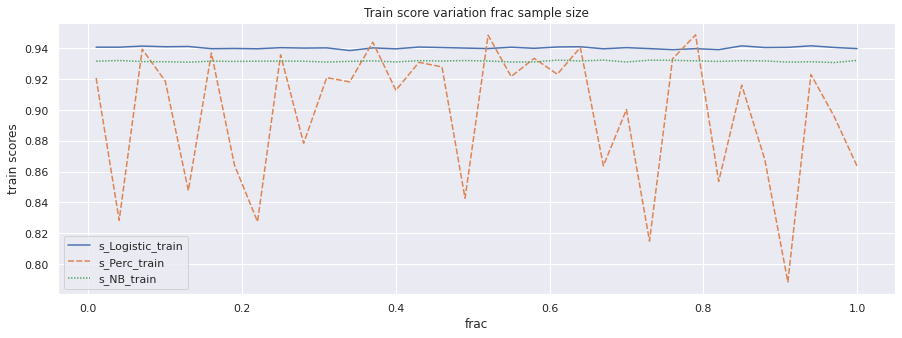

In [ ]:
plot_scores()

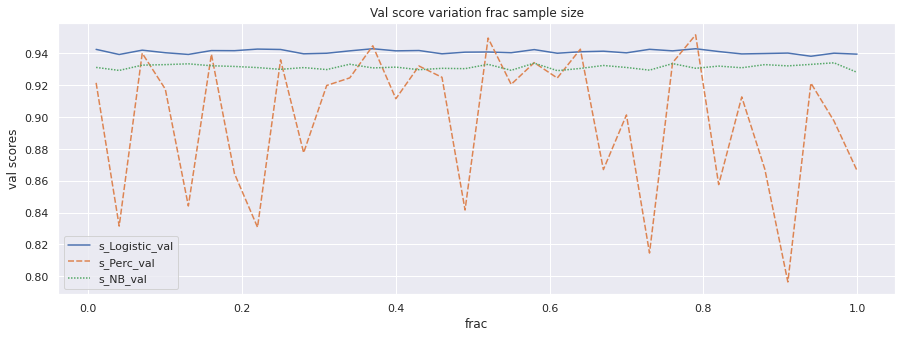

In [ ]:
plot_scores(dataset_type='val')

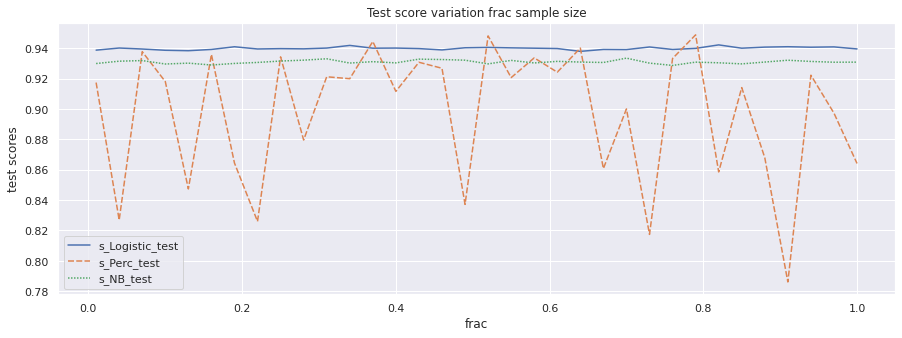

In [ ]:
plot_scores(dataset_type='test')

# Conclusiones

* Respecto al primer dataset (Reviews de Amazon) se pudo observar que, a medida que se fueron aumentando los datos de entrenamiento disponibles, los modelos clasificadores discriminativos tienden a ir a alza en el gráfico, obteniendo una mayor accuracy de predicción. Entre el 1% y el 20% de los datos, los clasificadores generativos tenían una mejor accuracy que los discriminativos. Por tanto, en base a este dataset, se comprueba la hipótesis planteada en un inicio.

* En cuanto al segundo dataset (Credit Card Fraud), entre el regresor logístico y Bernoulli Naive-Bayes no se ve mayor diferencia de variación del accuracy y se puede observar que el comportamiento es casi lineal, ganando el regresor logístico por sobre bayes. No se puede decir lo mismo del perceptrón, que tiene un comportamiento con variaciones más bien drásticas cambiando la cantidad de datos de entrenamiento. Esto anterior puede deberse quizás a que los datos simplemente no se ajustan bien al modelo del perceptrón. En base a lo anterior, no comprobamos la hipótesis planteada.

* Entonces, podemos concluir que la comprobación de la hipótesis dependerá no solo de la cantidad de datos que se tengan etiquetados, sino también de qué tipos de datos son los que se quieren predecir, ya que observamos que con 2 dataset distintos (uno de texto y otro más "numérico" por así decirlo) los modelos se comportan distintos. Lo anterior se pudo haber complementado de mejor forma si se hubiese realizado trabajo con otro dataset más para tener más resultados empíricos y poder comparar con los que ya se obtuvieron más robustamente.

# Parte 2. Desafío



<table align='left'>
<tr>
<td><img src='https://imgnew.outlookindia.com/uploadimage/library/16_9/16_9_5/IMAGE_1651242910.jpg' width='800'/> </td>
</tr>
</table>

https://www.kaggle.com/t/4f10233cffc94f679fd1dfbc604c2165

En este desafío exploraremos el problema de predecir si una solicitud de crédito a un banco será pagada o no, una versión binaria de lo que se denomina análisis de riesgo, que es su vez una de las aplicaciones más comunes del aprendizaje automático en la industria financiera. Esta intersección tecnología + industria financiera (Fintech) es una de las áreas laborales de mayor crecimiento reciente.


# Análisis Exploratorio De Datos

In [ ]:
#Si carga los datos localmente no necesita ejecutar esta celda.
#Si los carga desde Drive, debe cambiar la ruta a la carpeta donde se encuentran. 

print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=False)
 
path = "/content/drive/My Drive/Taller 1 - ML/"#Esta es la ruta


Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import imblearn
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
df_solicitudes_train = pd.read_csv(path+'Pregunta 2/ml-fintech/solicitudes_train.csv')

In [ ]:
df_solicitudes_train = df_solicitudes_train.drop(columns=['Unnamed: 0'])
df_solicitudes_train.index = df_solicitudes_train['SK_ID_CURR']
df_solicitudes_train = df_solicitudes_train.drop(columns=['SK_ID_CURR'])
df_solicitudes_train


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
331475,0,Cash loans,F,Y,Y,0,135000.0,835380.0,30955.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
366488,0,Cash loans,F,N,Y,0,103500.0,659533.5,26284.5,589500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
444791,0,Cash loans,F,N,Y,0,135000.0,219042.0,23130.0,193500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
112960,0,Revolving loans,F,N,Y,0,67500.0,675000.0,33750.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
418735,0,Revolving loans,F,N,Y,0,315000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244356,0,Cash loans,M,N,Y,0,112500.0,112068.0,11610.0,99000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
213955,0,Cash loans,F,N,Y,0,135000.0,781920.0,32998.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
376877,0,Revolving loans,F,N,Y,0,135000.0,202500.0,10125.0,202500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df_solicitudes_test = pd.read_csv(path+'Pregunta 2/ml-fintech/solicitudes_test.csv')
df_solicitudes_test = df_solicitudes_test.drop(columns=['Unnamed: 0'])
df_solicitudes_test.index = df_solicitudes_test['SK_ID_CURR']
df_solicitudes_test = df_solicitudes_test.drop(columns=['SK_ID_CURR'])
df_solicitudes_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
251482,Cash loans,M,Y,Y,1,247500.0,338832.0,17869.5,292500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152322,Cash loans,F,Y,Y,0,157500.0,566055.0,16681.5,472500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
213864,Cash loans,F,Y,N,0,225000.0,1024740.0,52452.0,900000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
149195,Cash loans,M,Y,Y,1,90000.0,1078200.0,31653.0,900000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
215443,Cash loans,F,N,Y,0,81000.0,269550.0,12964.5,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449354,Cash loans,F,N,Y,0,157500.0,808650.0,29709.0,675000.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
118433,Cash loans,M,N,Y,0,540000.0,306000.0,11664.0,306000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
177671,Cash loans,F,N,N,0,112500.0,454500.0,19107.0,454500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
df_solicitudes_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,150679.000000,150679.000000,1.506790e+05,1.506790e+05,150674.000000,1.505370e+05,150679.000000,150679.000000,150679.000000,150679.000000,...,150679.000000,150679.000000,150679.000000,150679.000000,130255.000000,130255.000000,130255.000000,130255.000000,130255.000000,130255.000000
mean,0.080728,0.414842,1.681505e+05,5.993161e+05,27136.709847,5.388100e+05,0.020846,-16048.431892,64027.408259,-4991.670910,...,0.008176,0.000571,0.000544,0.000378,0.006602,0.007447,0.034102,0.262508,0.264873,1.900042
std,0.272418,0.719823,1.099289e+05,4.015602e+05,14482.075674,3.688241e+05,0.013796,4362.574783,141455.615395,3529.124251,...,0.090053,0.023884,0.023322,0.019446,0.085236,0.115804,0.202790,0.896681,0.612343,1.865909
min,0.000000,0.000000,2.610000e+04,4.500000e+04,1993.500000,4.500000e+04,0.000290,-25201.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19695.000000,-2759.000000,-7492.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.485000e+05,5.174190e+05,24939.000000,4.500000e+05,0.018850,-15770.000000,-1213.000000,-4506.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34650.000000,6.795000e+05,0.028663,-12429.000000,-288.000000,-2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,23.000000,8.000000,25.000000


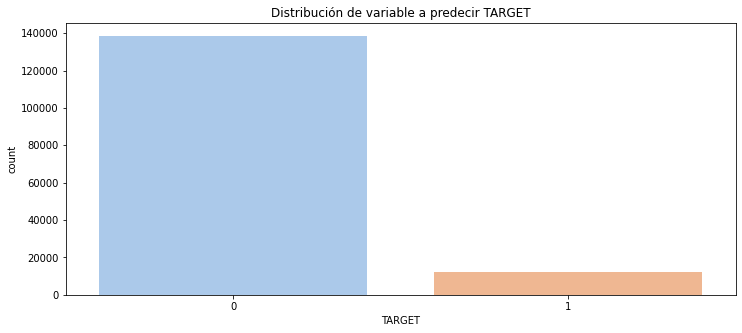

0    138515
1     12164
Name: TARGET, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(12,5),nrows=1)
sns.countplot(x = 'TARGET', data=df_solicitudes_train, palette="pastel", ax = ax)
ax.set_title('Distribución de variable a predecir TARGET')
plt.show()

df_solicitudes_train['TARGET'].value_counts()

Notemos que estamos lidiando con un dataset desbalanceado. Probablemente para poder intentar mejorar el desempeño de nuestro modelo debamos utilizar técnicas de oversampling o undersampling 


In [ ]:
df_solicitudes_train.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

Veamos cuantos datos NaN existen en las columnas

In [ ]:
# revisamos cuantos datos faltan por columna
print("Número de datos NaN por feature, train set: \n")
print(df_solicitudes_train.isnull().sum(axis = 0).sort_values(ascending=False).head(20))

Número de datos NaN por feature, train set: 

COMMONAREA_AVG              105261
COMMONAREA_MODE             105261
COMMONAREA_MEDI             105261
NONLIVINGAPARTMENTS_AVG     104582
NONLIVINGAPARTMENTS_MODE    104582
NONLIVINGAPARTMENTS_MEDI    104582
FONDKAPREMONT_MODE          102975
LIVINGAPARTMENTS_MEDI       102961
LIVINGAPARTMENTS_AVG        102961
LIVINGAPARTMENTS_MODE       102961
FLOORSMIN_AVG               102178
FLOORSMIN_MODE              102178
FLOORSMIN_MEDI              102178
YEARS_BUILD_AVG             100136
YEARS_BUILD_MEDI            100136
YEARS_BUILD_MODE            100136
OWN_CAR_AGE                  99515
LANDAREA_MEDI                89304
LANDAREA_AVG                 89304
LANDAREA_MODE                89304
dtype: int64


In [ ]:
# revisamos cuantos datos faltan por columna
print("Número de datos NaN por feature, train set: \n")
print(df_solicitudes_test.isnull().sum(axis = 0).sort_values(ascending=False).head(20))

Número de datos NaN por feature, train set: 

COMMONAREA_MODE             45076
COMMONAREA_MEDI             45076
COMMONAREA_AVG              45076
NONLIVINGAPARTMENTS_MEDI    44877
NONLIVINGAPARTMENTS_AVG     44877
NONLIVINGAPARTMENTS_MODE    44877
LIVINGAPARTMENTS_AVG        44162
LIVINGAPARTMENTS_MODE       44162
LIVINGAPARTMENTS_MEDI       44162
FONDKAPREMONT_MODE          44130
FLOORSMIN_AVG               43811
FLOORSMIN_MEDI              43811
FLOORSMIN_MODE              43811
YEARS_BUILD_MODE            42925
YEARS_BUILD_AVG             42925
YEARS_BUILD_MEDI            42925
OWN_CAR_AGE                 42542
LANDAREA_MEDI               38386
LANDAREA_MODE               38386
LANDAREA_AVG                38386
dtype: int64


Antes de visualizar algunos datos, reemplazaremos todos los datos nulos de la siguiente forma:
* Para datos categóricos o strings (tipo object) se reemplazará por la moda
* Para datos numéricos, se reemplazará por la mediana (es más robusta frente a outliers)

Lo anterior se realizará tanto para el train set como el test set

In [ ]:
def handle_missing(df):
    # copia del dataframe
    df_copy = df.copy()
    
    # obtenemos columnas numéricas y no numéricas
    float_columns = df_copy.select_dtypes(include=['float64']).columns.tolist()
    int_columns = df_copy.select_dtypes(include=['int64']).columns.tolist()
    string_columns = df_copy.select_dtypes(exclude=[np.number]).columns.tolist()
    
    numerical_columns = float_columns + int_columns
    
    # rellenamos las numéricas con la mediana
    for column in numerical_columns:
        df_copy[column] = df_copy[column].fillna((df_copy[column].median()))
        
    # rellenamos las columnas de strings con la moda
    for column in string_columns:
        df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
    
    # retornamos el nuevo dataframe
    return df_copy

In [ ]:
df_solicitudes_train_clean = handle_missing(df_solicitudes_train)
df_solicitudes_test_clean = handle_missing(df_solicitudes_test)

In [ ]:
# revisamos cuantos datos faltan por columna
print("Número de datos NaN por feature, train set: \n")
print(df_solicitudes_train_clean.isnull().sum(axis = 0).sort_values(ascending=False).head())

print()

# revisamos cuantos datos faltan por columna
print("Número de datos NaN por feature, test set: \n")
print(df_solicitudes_test_clean.isnull().sum(axis = 0).sort_values(ascending=False).head())

Número de datos NaN por feature, train set: 

TARGET                 0
COMMONAREA_MODE        0
EMERGENCYSTATE_MODE    0
WALLSMATERIAL_MODE     0
TOTALAREA_MODE         0
dtype: int64

Número de datos NaN por feature, test set: 

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
EMERGENCYSTATE_MODE    0
WALLSMATERIAL_MODE     0
TOTALAREA_MODE         0
dtype: int64


Realizaremos un par de visualizaciones para algunas columnas

In [ ]:
gr = df_solicitudes_train_clean.groupby(['OCCUPATION_TYPE']).size().reset_index(name='counts') 
gr = gr.sort_values(by='counts', ascending=False)
gr

,OCCUPATION_TYPE,counts
8,Laborers,74379
14,Sales staff,15634
3,Core staff,13318
10,Managers,10529
4,Drivers,9240
6,High skill tech staff,5488
0,Accountants,4833
11,Medicine staff,4217
16,Security staff,3260
2,Cooking staff,2944


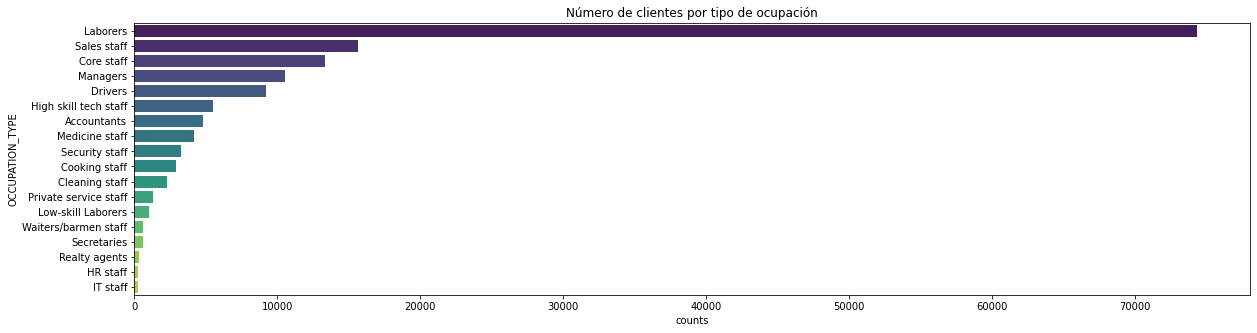

In [ ]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1)
sns.barplot(data=gr, y='OCCUPATION_TYPE', x='counts', palette="viridis",ax=ax)
ax.set_title('Número de clientes por tipo de ocupación')
plt.show()

In [ ]:
df_solicitudes_train_clean['AMT_CREDIT'].describe()

count    1.506790e+05
mean     5.993161e+05
std      4.015602e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.174190e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

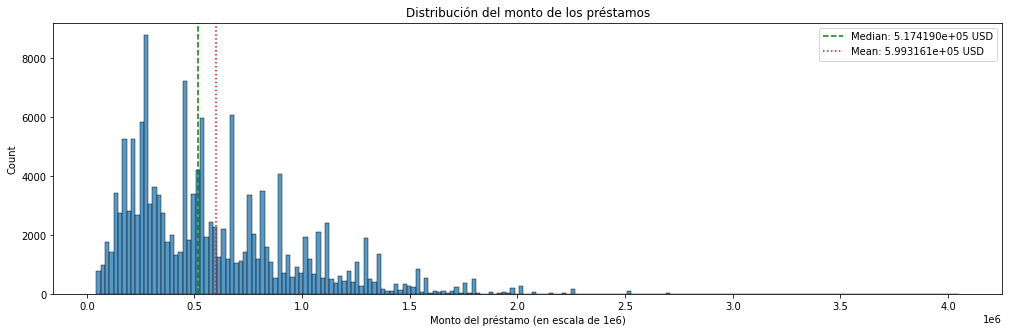

In [ ]:
plt.figure(figsize=(17,5))
plt.xlabel('Monto del préstamo (en escala de 1e6)')
plt.title('Distribución del monto de los préstamos')
sns.histplot(df_solicitudes_train_clean['AMT_CREDIT'],bins=200,kde=False)
plt.axvline(x=df_solicitudes_train_clean['AMT_CREDIT'].median(), 
            linestyle='--',
            color='green',
            label='Median: {:e} USD'.format(np.median(df_solicitudes_train_clean['AMT_CREDIT'])))

plt.axvline(x=df_solicitudes_train_clean['AMT_CREDIT'].mean(), 
            linestyle=':',
            color='red',
            label='Mean: {:e} USD'.format(np.mean(df_solicitudes_train_clean['AMT_CREDIT'])))

plt.legend(loc=0)
plt.show()

In [ ]:
df_solicitudes_train_clean['AMT_INCOME_TOTAL'].describe()

count    1.506790e+05
mean     1.681505e+05
std      1.099289e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
gr_income_occupation = df_solicitudes_train_clean.groupby(['OCCUPATION_TYPE']).mean()['AMT_INCOME_TOTAL'].reset_index(name='mean')
gr_income_occupation = gr_income_occupation.sort_values(by='mean',ascending=False)
gr_income_occupation

,OCCUPATION_TYPE,mean
10,Managers,256839.703115
7,IT staff,210238.213483
13,Realty agents,196781.518625
0,Accountants,196240.405959
4,Drivers,186544.065195
5,HR staff,183158.134615
6,High skill tech staff,182150.574804
12,Private service staff,179633.013067
3,Core staff,173782.757064
15,Secretaries,166559.461234


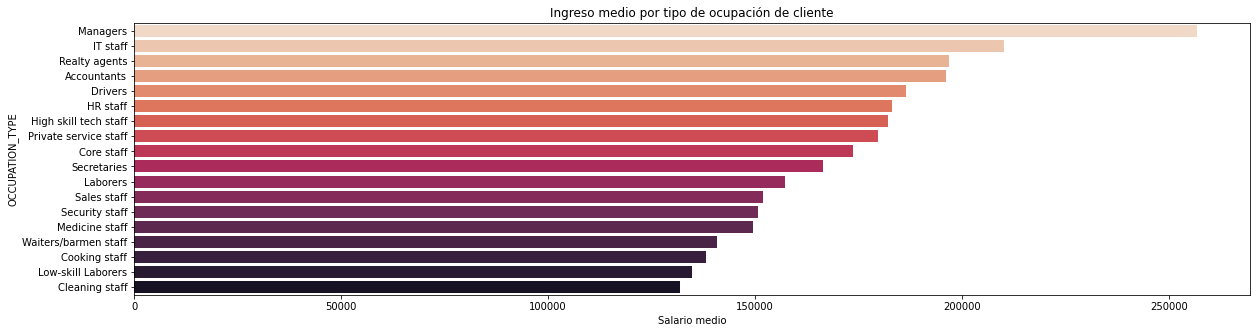

In [ ]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1)
sns.barplot(data=gr_income_occupation, y='OCCUPATION_TYPE', x='mean', palette="rocket_r",ax=ax)
ax.set_xlabel('Salario medio')
ax.set_title('Ingreso medio por tipo de ocupación de cliente')
plt.show()

In [ ]:
gr_ORGANIZATION_TYPE = df_solicitudes_train_clean.groupby(['ORGANIZATION_TYPE']).size().reset_index(name='counts') 
gr_ORGANIZATION_TYPE = gr_ORGANIZATION_TYPE.sort_values(by='counts', ascending=False)
gr_ORGANIZATION_TYPE

,ORGANIZATION_TYPE,counts
5,Business Entity Type 3,33298
57,XNA,27221
42,Self-employed,18716
33,Other,8219
30,Medicine,5439
4,Business Entity Type 2,5219
11,Government,5128
39,School,4309
51,Trade: type 7,3834
28,Kindergarten,3359


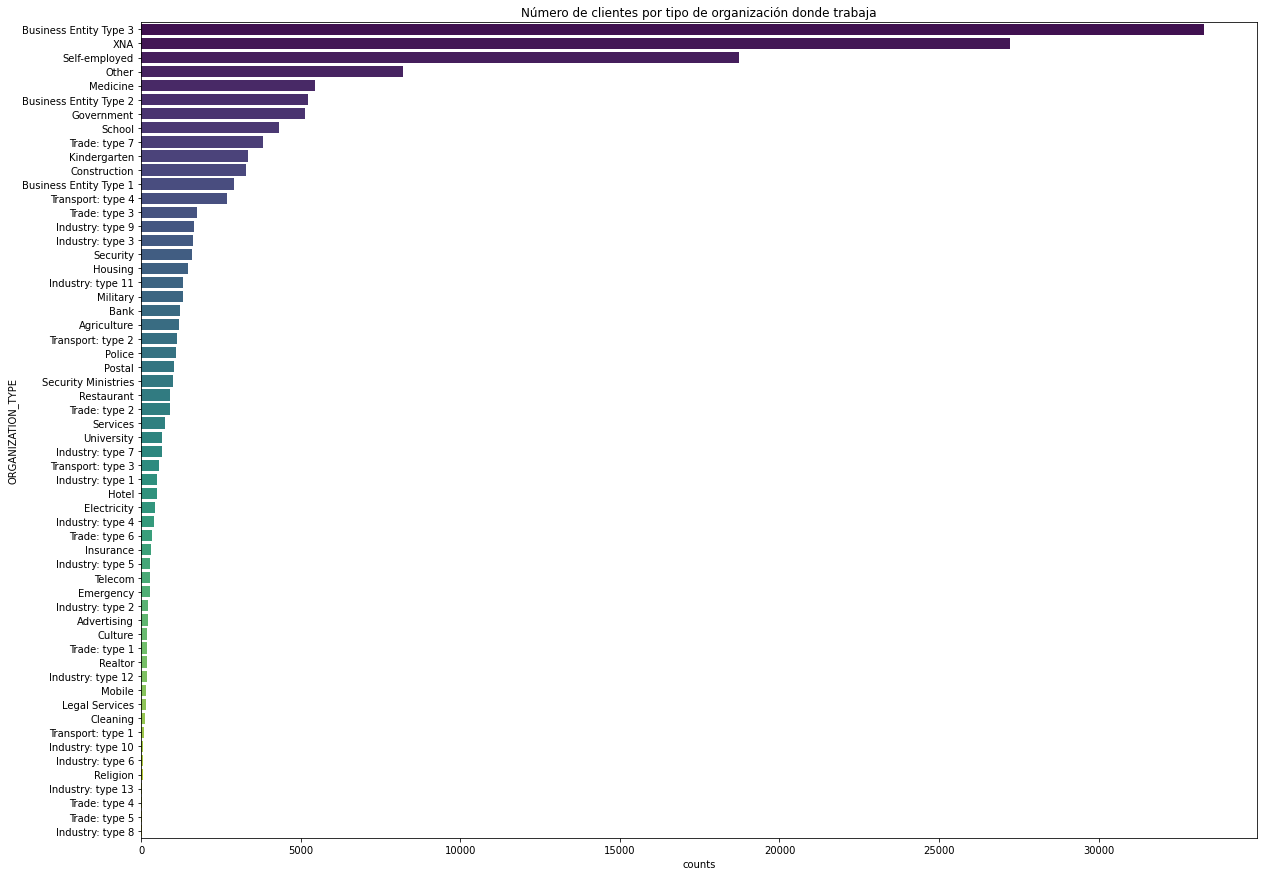

In [ ]:
fig, ax = plt.subplots(figsize=(20,15),nrows=1)
sns.barplot(data=gr_ORGANIZATION_TYPE, y='ORGANIZATION_TYPE', x='counts', palette="viridis",ax=ax)
ax.set_title('Número de clientes por tipo de organización donde trabaja')
plt.show()

Pero podemos ver el nivel de correlación de las columnas hacia la variable TARGET

# Pipeline 1
* Utilizar todas las features disponibles
* Reemplazar los valores nulos categóricos por la moda y los valores numéricos con la mediana
* Utilizar oversampling, para balancear las clases
* Se utiliza **Regresor Logístico** como modelo para ajustar los datos de entrenamiento

## Preprocesamiento

In [ ]:
# retorna X, y para poder trabajar directamente con el modelo
def process_dataset_dummies(df, balance=False):
    df_copy = df.copy()
    string_columns = df_copy.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # sacamos los dummies de todas las variables string
    dummies = []
    for column in string_columns:
        dummy = pd.get_dummies(df_copy[column], prefix=column)
        dummies.append(dummy)

    # las almacenamos en un df para luego concatenarlo con el original    
    binary_features = pd.DataFrame()
    for dummy in dummies:
        binary_features = pd.concat([binary_features, dummy], axis=1)
    
    # ahora concatenamos
    # sacamos todas las columnas que no sean strings    
    non_string_columns = set(df_copy.columns) - set(string_columns)
    X_numerical = df_copy[non_string_columns]
    
    X = pd.concat([binary_features, X_numerical], axis=1)
    
    try:
        y = X['TARGET']
        X = X.drop(['TARGET'], axis=1)
    except:
        print("Estás probando con test dataset")
        return X
    print("X, y shape:", X.shape, y.shape) # numero de (fila, columnas)
    
    return X, y

In [ ]:
X, y = process_dataset_dummies(df_solicitudes_train_clean)
X_test = process_dataset_dummies(df_solicitudes_test_clean)

X, y shape: (150679, 244) (150679,)
Estás probando con test dataset


In [ ]:
# ahora obtenemos las columnas a estandarizar
estandarizar_columnas = []
for column in X.columns:
    if not (X[column].between(0,1).sample().values[0]):
        estandarizar_columnas.append(column)


## Modelamiento

Usaremos:
* Perceptrón
* Regresión Logística

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(X, y):
    # summarize class distribution
    print(Counter(y))
    
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)
    
    # summarize class distribution
    print(Counter(y_over))
    
    return X_over, y_over

def over_under_sample(X,y):
    # instantiating over and under sampler
    over = RandomOverSampler(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=0.8)
    
    # first performing oversampling to minority class
    X_over, y_over = over.fit_resample(X, y)
    print(f"Oversampled: {Counter(y_over)}")
   
    # now to comine under sampling 
    X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
    print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
    
    return X_combined_sampling, y_combined_sampling

In [ ]:
# oversample
X_over, y_over = oversample(X,y)

# over_under_sample
# X_over, y_over = over_under_sample(X,y)


Counter({0: 138515, 1: 12164})
Counter({0: 138515, 1: 138515})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# validación, test está en otro dataset aparte
X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, random_state=0, train_size = 0.8)

# chequeo dimensiones
print("X,y Shapes:", X_over.shape, y_over.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)

# escalamiento normalizacion N(0,1)
scaler = StandardScaler()
X_train[estandarizar_columnas] = scaler.fit_transform(X_train[estandarizar_columnas]) #fit!!!!!!!!!!!!!!!!
X_val[estandarizar_columnas] = scaler.transform(X_val[estandarizar_columnas])

X,y Shapes: (277030, 244) (277030,)
X,y Train Shapes: (221624, 244) (221624,)
X,y Val Shapes: (55406, 244) (55406,)


In [ ]:
X_train

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,OBS_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,DAYS_REGISTRATION,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BEGINEXPLUATATION_MODE,OWN_CAR_AGE,YEARS_BUILD_MEDI,LIVINGAPARTMENTS_MODE,ELEVATORS_MODE
162941,1,0,1,0,0,0,1,1,0,0,...,1.049706,0.0000,-0.961542,1.776983,-0.450290,0.9816,1.089944,0.7585,0.0762,0.0000
2830,1,0,1,0,0,1,0,1,0,0,...,-0.591416,0.0800,0.996664,-0.191783,-0.450290,0.9821,-0.169077,0.7585,0.0661,0.0806
30217,1,0,0,1,0,0,1,1,0,0,...,0.229145,0.0000,1.382990,-0.191783,-0.450290,0.9782,-1.148316,0.7585,0.0762,0.0000
45725,1,0,0,1,0,0,1,1,0,0,...,-0.591416,0.0000,1.236110,-0.191783,-0.450290,0.9737,0.530379,0.7585,0.0762,0.0000
181007,1,0,0,1,0,0,1,0,1,0,...,-0.181135,0.0000,0.400967,1.776983,0.112145,0.9816,2.209074,0.7585,0.0762,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,1,0,0,1,0,0,1,0,1,0,...,0.639426,0.0000,-0.009012,-0.191783,0.112145,0.9871,-1.008424,0.8256,0.0248,0.0000
86293,1,0,1,0,0,0,1,0,1,0,...,-0.591416,0.0000,1.343861,1.776983,0.674580,0.9816,1.509618,0.7585,0.0762,0.0000
122579,1,0,0,1,0,1,0,0,1,0,...,-0.591416,0.0724,1.382114,-0.191783,0.112145,0.9980,-0.169077,0.9732,0.3140,0.0403
152315,0,1,1,0,0,1,0,0,1,0,...,0.229145,0.0000,1.253923,1.776983,0.112145,0.9816,-0.169077,0.7585,0.0762,0.0000



Train/Val/
0.6067348301627983 0.6071364112190015


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


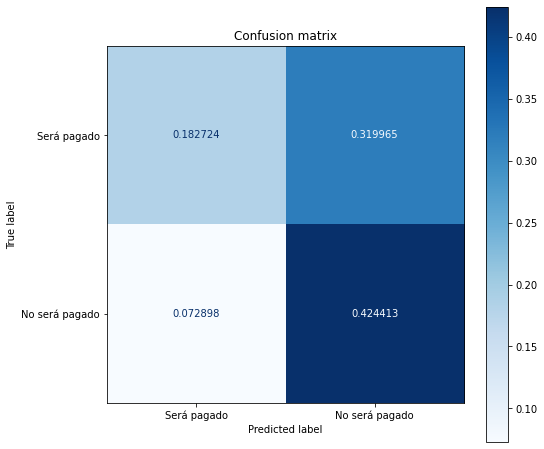

---------------------------------------------------------------------------------------------------------------------------------------
Recall Score: 0.85
Precision Score: 0.57
F1 Score: 0.68
Accuracy Score: 0.61
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix

def perceptron(X_train, y_train, X_val, y_val):
    X_train_vals = X_train.values; y_train_vals = y_train.values;
    X_val_vals = X_val.values; y_val_vals = y_val.values;
    
    clf = Perceptron(tol=1e-3,eta0=0.1,random_state=0) ##tolerancia de mejora

    clf.fit(X_train_vals, y_train_vals) ## entrena ejecuta el conjunto de entrenamiento.
    train_acc = clf.score(X_train_vals, y_train_vals) ## 
    val_acc = clf.score(X_val_vals, y_val_vals) ### resultado validacion. 
    ###......####
    print("\nTrain/Val/")
    print(train_acc,val_acc)
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix", None),
                      ("Normalized confusion matrix", 'true')]



    fig, ax = plt.subplots(figsize=(8, 8))

    plot_confusion_matrix(clf, X_val_vals, y_val_vals,
                                     display_labels=["Será pagado", "No será pagado"],
                                     cmap=plt.cm.Blues,values_format= 'f',ax=ax, normalize='all') 
    plt.grid(False)
    plt.title(titles_options[0][0])
    plt.show()


    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
    y_pred = clf.predict(X_train_vals)

    # Overfitting Case
    print('---' * 45)
    print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
    print('---' * 45)



perceptron(X_train, y_train, X_val, y_val)


array([[19166,  8686],
       [ 8639, 18915]])

0.6873082337652962

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


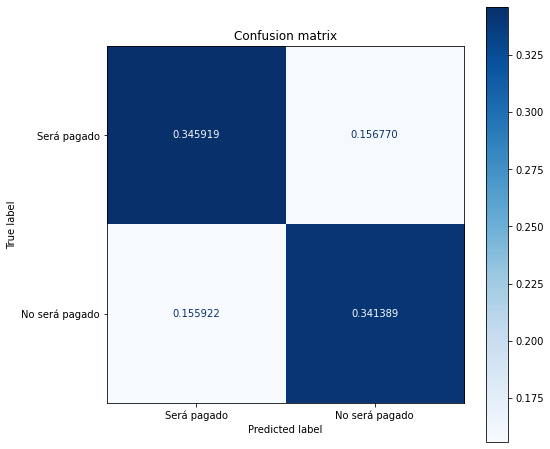

---------------------------------------------------------------------------------------------------------------------------------------
Recall Score: 0.69
Precision Score: 0.69
F1 Score: 0.69
Accuracy Score: 0.69
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

def Logistic(X_train, y_train, X_val, y_val):
    X_train_vals = X_train.values; y_train_vals = y_train.values;
    X_val_vals = X_val.values; y_val_vals = y_val.values;
   # import the class

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(solver='liblinear')
    
    # fit the model with data
    logreg.fit(X_train_vals, y_train_vals)

    y_pred = logreg.predict(X_val_vals)
    
    # Plot non-normalized confusion matrix
    # import the metrics class
    from sklearn import metrics

    cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
    display(cnf_matrix)
    from sklearn.metrics import accuracy_score
    display(accuracy_score(y_val, y_pred))
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix", None),
                      ("Normalized confusion matrix", 'true')]



    fig, ax = plt.subplots(figsize=(8, 8))

    plot_confusion_matrix(logreg, X_val_vals, y_val_vals,
                                     display_labels=["Será pagado", "No será pagado"],
                                     cmap=plt.cm.Blues,values_format= 'f',ax=ax, normalize='all') 
    plt.grid(False)
    plt.title(titles_options[0][0])
    plt.show()

    
    from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

    # Overfitting Case
    print('---' * 45)
    print('Recall Score: {:.2f}'.format(recall_score(y_val, y_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(y_val, y_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(y_val, y_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(y_val, y_pred)))
    print('---' * 45)

    
    
Logistic(X_train, y_train, X_val, y_val)


Esta pipeline obtuvo en Kaggle un score de **0.53009**, por lo que veremos otros approach para intentar mejorar este resultado

# Pipeline 2

* Eliminaremos features que tengan más del 40% de los datos nulos 
* Se reemplazaran todos los datos nulos con la media
* Se aplicará PCA con $n = 10$ componentes para poder trabajar con menor cantidad de features
* Se utilizará **Perceptrón** como modelo para ajustar los datos de entrenamiento

## Preprocesamiento

In [ ]:
df_solicitudes_train=pd.read_csv(path+'/Pregunta 2/ml-fintech/solicitudes_train.csv')           #lectura del dataframe de entrenamineto
data_train=df_solicitudes_train.drop(columns=['Unnamed: 0'])
data_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,331475,0,Cash loans,F,Y,Y,0,135000.0,835380.0,30955.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,366488,0,Cash loans,F,N,Y,0,103500.0,659533.5,26284.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,444791,0,Cash loans,F,N,Y,0,135000.0,219042.0,23130.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,112960,0,Revolving loans,F,N,Y,0,67500.0,675000.0,33750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
4,418735,0,Revolving loans,F,N,Y,0,315000.0,900000.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,244356,0,Cash loans,M,N,Y,0,112500.0,112068.0,11610.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
150675,213955,0,Cash loans,F,N,Y,0,135000.0,781920.0,32998.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
150676,376877,0,Revolving loans,F,N,Y,0,135000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
150677,246747,0,Cash loans,F,N,N,1,135000.0,508495.5,21541.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_solicitudes_test=pd.read_csv(path+'/Pregunta 2/ml-fintech/solicitudes_test.csv')             #lectura del dataframe de test
data_test=df_solicitudes_test.drop(columns=['Unnamed: 0'])
data_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,251482,Cash loans,M,Y,Y,1,247500.0,338832.0,17869.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,152322,Cash loans,F,Y,Y,0,157500.0,566055.0,16681.5,472500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,213864,Cash loans,F,Y,N,0,225000.0,1024740.0,52452.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
3,149195,Cash loans,M,Y,Y,1,90000.0,1078200.0,31653.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,215443,Cash loans,F,N,Y,0,81000.0,269550.0,12964.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64573,449354,Cash loans,F,N,Y,0,157500.0,808650.0,29709.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
64574,118433,Cash loans,M,N,Y,0,540000.0,306000.0,11664.0,306000.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
64575,177671,Cash loans,F,N,N,0,112500.0,454500.0,19107.0,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
64576,449847,Cash loans,F,N,Y,0,112500.0,805882.5,25434.0,612000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0


In [ ]:
dim_data_train=df_solicitudes_train.shape                           #dimensiones del datafrema de entrenamiento
columnas=data_train.columns                               #analisis exploratorio del nombre de las columnas del datframe de entrenamiento
print(columnas)
print("\n numero de columnas:", len(columnas))
print(data_train.dtypes.value_counts())                   #se determinan los tipo de datos son las columnas del dataframe de entrenamiento

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

 numero de columnas: 122
float64    65
int64      41
object     16
dtype: int64


In [ ]:
porc_null=data_train.isnull().sum()/dim_data_train[0]               #analisis exploratorio del procentaje de datos nulos en cada columna
validos=[]                                                          #lista para guardar el nombre de columnas que cumplen cierta cantidad maxima de datos nulos
for i in range(len(porc_null)):
  if porc_null[i]<=0.4:
    validos.append(columnas[i])

x_train=data_train[validos[2:]]
y_train=data_train['TARGET']
x_test=data_test[validos[2:]]
id_test=data_test['SK_ID_CURR']

x_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,Y,Y,0,135000.0,835380.0,30955.5,675000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,F,N,Y,0,103500.0,659533.5,26284.5,589500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,Cash loans,F,N,Y,0,135000.0,219042.0,23130.0,193500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,Revolving loans,F,N,Y,0,67500.0,675000.0,33750.0,675000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
4,Revolving loans,F,N,Y,0,315000.0,900000.0,45000.0,900000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,Cash loans,M,N,Y,0,112500.0,112068.0,11610.0,99000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
150675,Cash loans,F,N,Y,0,135000.0,781920.0,32998.5,675000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
150676,Revolving loans,F,N,Y,0,135000.0,202500.0,10125.0,202500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
150677,Cash loans,F,N,N,1,135000.0,508495.5,21541.5,454500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aux_1=[]                                                            #lista para guardar las columnas con datos string
aux_2=[]                                                            #lista para guardar los diferentes datos que hay en las columnas con datos string
aux_3=[]                                                            #lista para guardar los cambios de valores de las columnas con datos string
for i in validos[2:]:
    a=x_train[i].loc[x_train[i].notnull()].unique()
    if x_train[i].dtype=='object':
        aux_1.append(i)
        aux_2.append(a)
        temp=np.arange(1,len(a)+1,1)
        aux_3.append(temp)
        
for i in range(len(aux_1)):                                         #ciclo for para hacer los cambios de los valores string a numeros
    x_train[aux_1[i]]=x_train[aux_1[i]].replace(aux_2[i], aux_3[i])
    x_test[aux_1[i]]=x_test[aux_1[i]].replace(aux_2[i], aux_3[i])
    
x_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,1,1,0,135000.0,835380.0,30955.5,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,1,0,103500.0,659533.5,26284.5,589500.0,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,1,1,2,1,0,135000.0,219042.0,23130.0,193500.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1,2,1,0,67500.0,675000.0,33750.0,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
4,2,1,2,1,0,315000.0,900000.0,45000.0,900000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,1,2,2,1,0,112500.0,112068.0,11610.0,99000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
150675,1,1,2,1,0,135000.0,781920.0,32998.5,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
150676,2,1,2,1,0,135000.0,202500.0,10125.0,202500.0,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
150677,1,1,2,2,1,135000.0,508495.5,21541.5,454500.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in x_train.columns:                                           #ciclo for para reemplazar los datos nulos en las columnas por la media
    x_train[i].fillna(x_train[i].mean(skipna=True), inplace=True )
    x_test[i].fillna(x_train[i].mean(skipna=True), inplace=True )

x_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,1,1,0,135000.0,835380.0,30955.5,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,1,0,103500.0,659533.5,26284.5,589500.0,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,1,1,2,1,0,135000.0,219042.0,23130.0,193500.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1,2,1,0,67500.0,675000.0,33750.0,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
4,2,1,2,1,0,315000.0,900000.0,45000.0,900000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,1,2,2,1,0,112500.0,112068.0,11610.0,99000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
150675,1,1,2,1,0,135000.0,781920.0,32998.5,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
150676,2,1,2,1,0,135000.0,202500.0,10125.0,202500.0,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
150677,1,1,2,2,1,135000.0,508495.5,21541.5,454500.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()                                                 #normalizacion de los datos
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-0.32239751, -0.71729633, -1.39461908, ..., -0.31487311,
        -0.4652357 , -1.09522559],
       [-0.32239751, -0.71729633,  0.71704167, ..., -0.31487311,
        -0.4652357 ,  1.21046125],
       [-0.32239751, -0.71729633,  0.71704167, ..., -0.31487311,
        -0.4652357 , -0.51880388],
       ...,
       [ 3.10176088, -0.71729633,  0.71704167, ..., -0.31487311,
        -0.4652357 ,  0.05761783],
       [-0.32239751, -0.71729633,  0.71704167, ..., -0.31487311,
        -0.4652357 , -1.09522559],
       [ 3.10176088, -0.71729633,  0.71704167, ..., -0.31487311,
        -0.4652357 , -1.09522559]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)                                          #eliminacion de las columnas con datos de ruido y reduccion del numero de columnas
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

x_train

array([[-2.88964492,  0.92644831,  2.46124368, ...,  0.12294484,
         0.14239903, -0.94125472],
       [-3.40359418,  1.18497491,  0.10172545, ..., -0.03735852,
         0.4989278 , -0.18600024],
       [-0.46657555, -1.4011884 , -0.74328896, ...,  0.00467252,
         0.95496381, -0.92396606],
       ...,
       [-3.64571005, -1.19872566,  0.4839484 , ..., -0.6021755 ,
         0.14295251, -0.30641203],
       [ 1.46907097,  1.6561914 , -2.06003594, ..., -2.55580169,
        -2.56195596,  0.26632405],
       [-0.41342455, -2.43640558, -1.1491702 , ..., -1.04325143,
         0.05505222,  2.25138574]])

In [ ]:
modelo_1=Perceptron(tol=1e-3, random_state=0)                       #entrenamiento del modelo perceptron del modelo
modelo_1.fit(x_train, y_train)
print(modelo_1.score(x_train, y_train))                             #error obtenido al entrenar el modelo
y_pred=modelo_1.predict(x_test)                                     #prediccion obtenida del modelo entrenado
y_pred

0.8922610317297035


array([0, 0, 0, ..., 0, 0, 1])

Esta pipeline obtuvo en Kaggle un score de **0.56383**, un poco mejor que el anterior obtenido

# Pipeline 3
* A la solución anterior, se le agregará el oversampling que fue utilizado en el Pipeline 1
* Se utilizará **Regresion Logística** como modelo para ajustar los datos de entrenamiento

In [ ]:
import pandas as pd
import numpy as np

## Preprocesamiento

In [ ]:
df_solicitudes_train=pd.read_csv(path+'/Pregunta 2/ml-fintech/solicitudes_train.csv')           #lectura del dataframe de entrenamineto
data_train=df_solicitudes_train.drop(columns=['Unnamed: 0'])

In [ ]:
df_solicitudes_test=pd.read_csv(path+'/Pregunta 2/ml-fintech/solicitudes_test.csv')           #lectura del dataframe de entrenamineto
data_test=df_solicitudes_test.drop(columns=['Unnamed: 0'])

In [ ]:
dim_data_train=df_solicitudes_train.shape                           #dimensiones del datafrema de entrenamiento
columnas_train=data_train.columns                                   #analisis exploratorio del nombre de las columnas del datframe de entrenamiento
print(columnas_train)
print("\n numero de columnas:", len(columnas_train))
print(data_train.dtypes.value_counts())                             #se determinan los tipo de datos son las columnas del dataframe de entrenamiento

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

 numero de columnas: 122
float64    65
int64      41
object     16
dtype: int64


In [ ]:
porc_null=data_train.isnull().sum()/dim_data_train[0]               #analisis exploratorio del procentaje de datos nulos en cada columna
validos=[]                                                          #lista para guardar el nombre de columnas que cumplen cierta cantidad maxima de datos nulos
for i in range(len(porc_null)):
  if porc_null[i]<=0.4:
    validos.append(columnas_train[i])
validos.remove('TARGET')
validos.remove('SK_ID_CURR')                                        #se remueve la columna target y SK_ID_CURR de la lista de las variables del modelo
    
y_train=data_train['TARGET']
x_train=data_train[validos]
x_test=data_test[validos]
id_test=data_test['SK_ID_CURR']

In [ ]:
aux_1=[]                                                            #lista para guardar las columnas con datos string
aux_2=[]                                                            #lista para guardar los diferentes datos que hay en las columnas con datos string
aux_3=[]                                                            #lista para guardar los cambios de valores de las columnas con datos string
for i in validos:
    a=x_train[i].loc[x_train[i].notnull()].unique()
    if x_train[i].dtype=='object':
        aux_1.append(i)
        aux_2.append(a)
        temp=np.arange(1,len(a)+1,1)
        aux_3.append(temp)

In [ ]:
for i in range(len(aux_1)):                                         #ciclo for para reeamplazar los valores de columnas con string a numeros
    x_train[aux_1[i]]=x_train[aux_1[i]].replace(aux_2[i], aux_3[i])
    x_test[aux_1[i]]=x_test[aux_1[i]].replace(aux_2[i], aux_3[i])
  

In [ ]:
for i in x_train.columns:                                           #ciclo for para reemplazar los datos nulos en las columnas por la media
    x_train[i].fillna(x_train[i].mean(skipna=True), inplace=True )
    x_test[i].fillna(x_train[i].mean(skipna=True), inplace=True )
    

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

def oversample(X, y):
    # summarize class distribution
    print(Counter(y))

    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')

    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)

    # summarize class distribution
    print(Counter(y_over))

    return X_over, y_over

In [ ]:
x_train, y_train=oversample(x_train, y_train)

Counter({0: 138515, 1: 12164})
Counter({0: 138515, 1: 138515})


## Modelamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()                                                 #normalizacion de los datos
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)                                          #eliminacion de las columnas con datos de ruido y reduccion del numero de columnas
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_2=LogisticRegression()                                       #entrenamiento del modelo regresion logistica
modelo_2.fit(x_train, y_train)

print(modelo_2.score(x_train, y_train))
y_pred=modelo_2.predict(x_test)

0.6219290329567195


In [ ]:
df_final=pd.DataFrame()
df_final['SK_ID_CURR']=id_test
df_final['TARGET']=y_pred
df_final
# df_final.to_csv('pred_test_3.csv', index=None)

,SK_ID_CURR,TARGET
0,251482,1
1,152322,1
2,213864,0
3,149195,1
4,215443,1
...,...,...
64573,449354,1
64574,118433,0
64575,177671,0
64576,449847,1


Esta pipeline obtuvo en Kaggle un score de **0.61655**, obteniendo el mejor resultado hasta ahora

# Comentarios finales
* Debido a la gran cantidad de features que existían, PCA fue de mucha ayuda para mantener las que son más relevantes
* Regresión logística mejor desempeño en general que perceptrón
* Oversampling resultó ser buena técnica para sinternizar datos de la clase minoritaria y así poder tener un dataset más balanceado
* Posibles formas de seguir mejorando el score sería realizar una mejor selección de features en base al análisis exploratorio de datos y también hacer uso de los otros dataframes dispuestos para el análisis y así poder hallar y/o generar nuevas features que puedan mejorar el desempeño del modelo